### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization

In [2]:
data_dir_train  = pathlib.Path('D:/machine learning/Skin cancer ISIC The International Skin Imaging Collaboration/Train/')
data_dir_test  = pathlib.Path('D:/machine learning/Skin cancer ISIC The International Skin Imaging Collaboration/Test/')


In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Create a dataset

In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(directory = data_dir_train
                                                               , seed = 123
                                                               , subset = 'training'
                                                               , validation_split= 0.2
                                                               , image_size=(img_height, img_width)
                                                               , batch_size = batch_size
                                                               )

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(directory = data_dir_train
                                                               , seed = 123
                                                               , subset = 'validation'
                                                               , validation_split= 0.2
                                                               , image_size=(img_height,img_width)
                                                               , batch_size = batch_size
                                                               )

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data

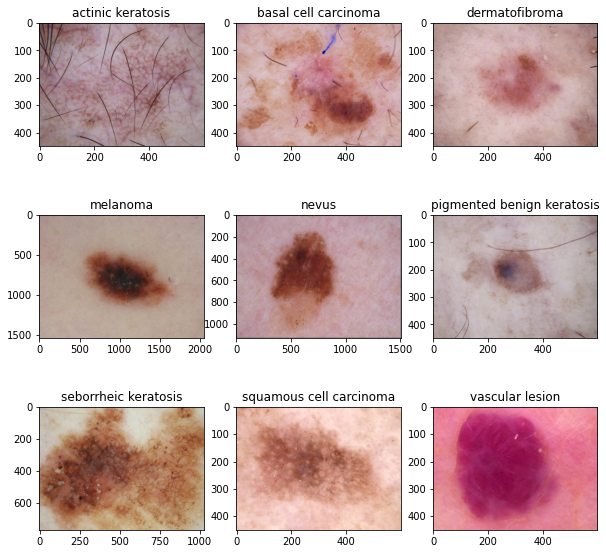

In [8]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
import matplotlib.image as mpimg
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = mpimg.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model 

In [10]:
### Your code goes here

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation, BatchNormalization, MaxPooling2D
num_classes = 9

model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])
model.add(Conv2D(16, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.15))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(num_classes))

### Compile the model 

In [11]:
from tensorflow.keras.optimizers import RMSprop, Adam, SGD, Adagrad

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 activation (Activation)     (None, 180, 180, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 activation_1 (Activation)   (None, 90, 90, 32)        0         
                                                        

### Train the model 

In [13]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 18s 278ms/step - loss: 2.1842 - accuracy: 0.2026 - val_loss: 2.0157 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 15s 265ms/step - loss: 2.0033 - accuracy: 0.2427 - val_loss: 1.9359 - val_accuracy: 0.3020
Epoch 3/20
56/56 [==============================] - 15s 263ms/step - loss: 1.8438 - accuracy: 0.3304 - val_loss: 1.6599 - val_accuracy: 0.4049
Epoch 4/20
56/56 [==============================] - 14s 258ms/step - loss: 1.5094 - accuracy: 0.4660 - val_loss: 1.5056 - val_accuracy: 0.4787
Epoch 5/20
56/56 [==============================] - 15s 261ms/step - loss: 1.4088 - accuracy: 0.5173 - val_loss: 1.4386 - val_accuracy: 0.5257
Epoch 6/20
56/56 [==============================] - 15s 262ms/step - loss: 1.2881 - accuracy: 0.5569 - val_loss: 1.4331 - val_accuracy: 0.5190
Epoch 7/20
56/56 [==============================] - 15s 264ms/step - loss: 1.2802 - accuracy: 0.5485 - val_loss: 1.4825 - val_accuracy: 0.5011

### Visualizing training results 

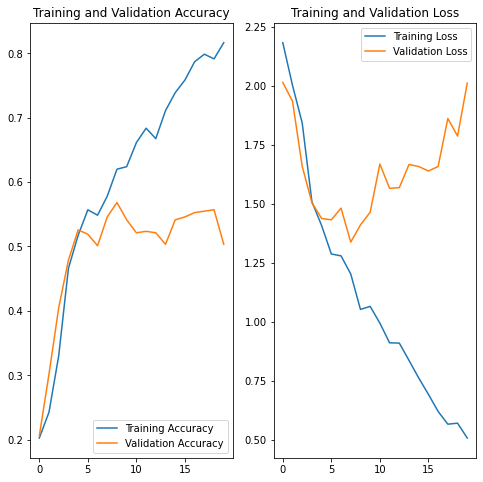

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Write your findings here 

In [15]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_aug = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

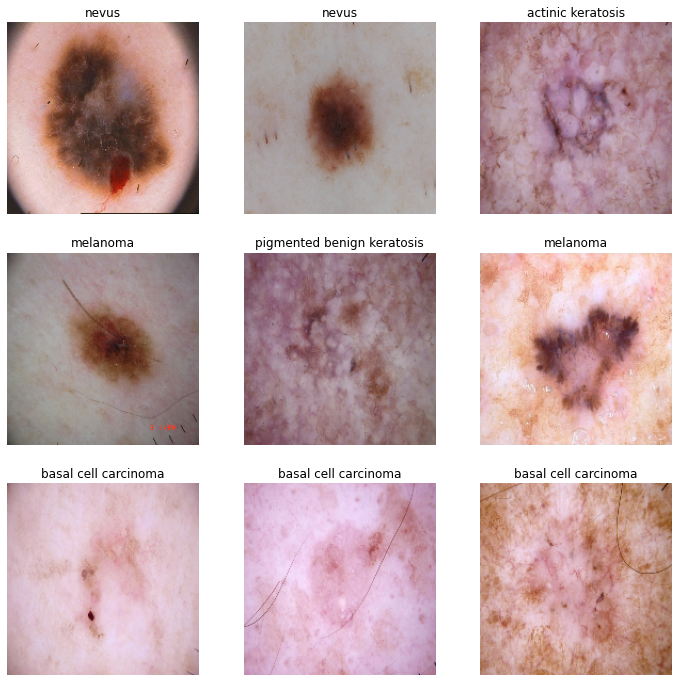

In [16]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_aug(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Create the model, compile and train the model 

In [17]:
num_classes = 9

model = data_aug
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(16, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.15))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 180, 180, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 180, 180, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 activation_4 (Activation)   (None, 180, 180, 16)      0         
                                                      

### Compiling the model 

In [19]:
## Your code goes here
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model 

In [20]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 17s 295ms/step - loss: 2.1065 - accuracy: 0.2015 - val_loss: 2.0420 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 16s 284ms/step - loss: 1.8358 - accuracy: 0.3320 - val_loss: 1.6831 - val_accuracy: 0.3893
Epoch 3/20
56/56 [==============================] - 16s 289ms/step - loss: 1.5045 - accuracy: 0.4821 - val_loss: 1.4866 - val_accuracy: 0.4855
Epoch 4/20
56/56 [==============================] - 16s 280ms/step - loss: 1.3938 - accuracy: 0.5167 - val_loss: 1.4369 - val_accuracy: 0.5168
Epoch 5/20
56/56 [==============================] - 15s 273ms/step - loss: 1.3845 - accuracy: 0.5056 - val_loss: 1.3950 - val_accuracy: 0.5347
Epoch 6/20
56/56 [==============================] - 15s 272ms/step - loss: 1.3119 - accuracy: 0.5368 - val_loss: 1.3828 - val_accuracy: 0.4989
Epoch 7/20
56/56 [==============================] - 16s 282ms/step - loss: 1.2594 - accuracy: 0.5469 - val_loss: 1.3575 - val_accuracy: 0.5302

### Visualizing the results 

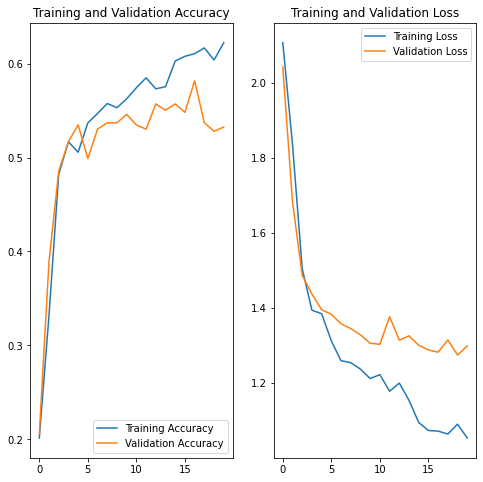

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
## Your code goes here.
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df


,Path,Label
0,D:\machine learning\Skin cancer ISIC The Inter...,actinic keratosis
1,D:\machine learning\Skin cancer ISIC The Inter...,actinic keratosis
2,D:\machine learning\Skin cancer ISIC The Inter...,actinic keratosis
3,D:\machine learning\Skin cancer ISIC The Inter...,actinic keratosis
4,D:\machine learning\Skin cancer ISIC The Inter...,actinic keratosis
...,...,...
2234,D:\machine learning\Skin cancer ISIC The Inter...,vascular lesion
2235,D:\machine learning\Skin cancer ISIC The Inter...,vascular lesion
2236,D:\machine learning\Skin cancer ISIC The Inter...,vascular lesion
2237,D:\machine learning\Skin cancer ISIC The Inter...,vascular lesion


<BarContainer object of 9 artists>

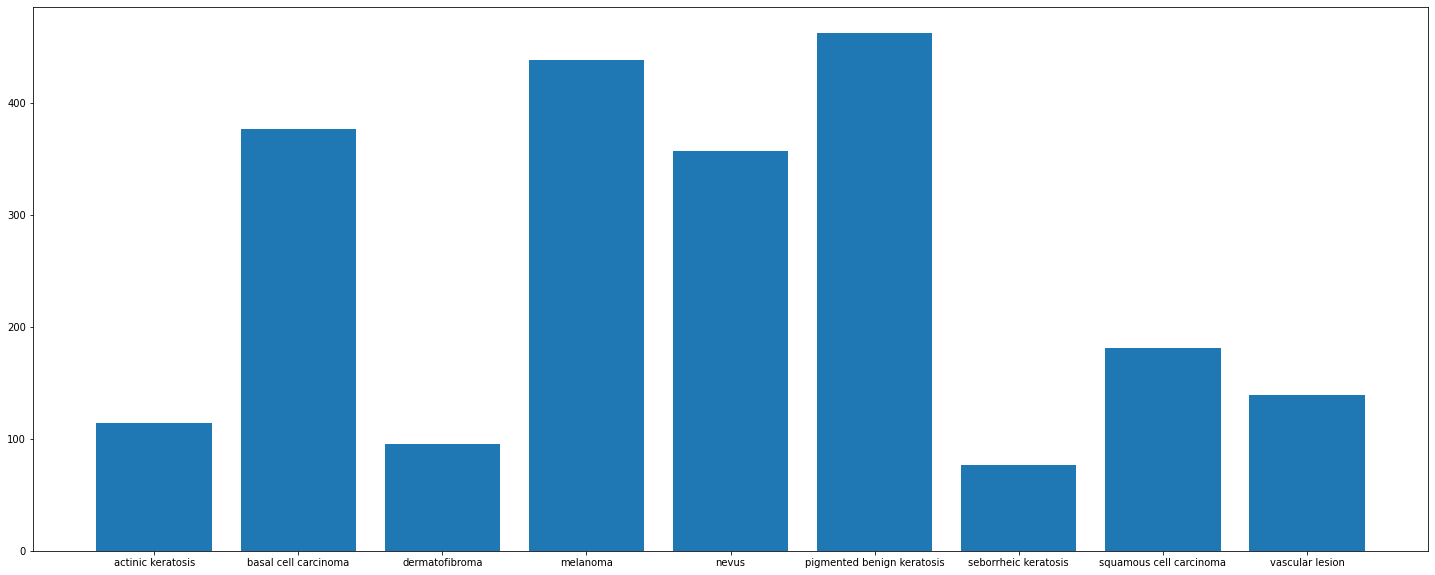

In [23]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

### Model with data augmentation and using Augmentor dataset 

##### Creating data augmentation 

In [24]:
data_aug = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

### Create a model 

In [25]:
num_classes = 9

# Building model with data augmentation and drop out layers
# Model building - Data augmentation -> Rescaling -> Conv2D -> MaxPooling2D -> Conv2D -> MaxPooling2D -> Conv2D -> MaxPooling2D -> Dropout -> Dense -> Dense

model = data_aug
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(16, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes))

### Compiling Model 

In [26]:
## your code goes here
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 180, 180, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 activation_8 (Activation)   (None, 180, 180, 16)      0         
                                                      

### Visualising data 

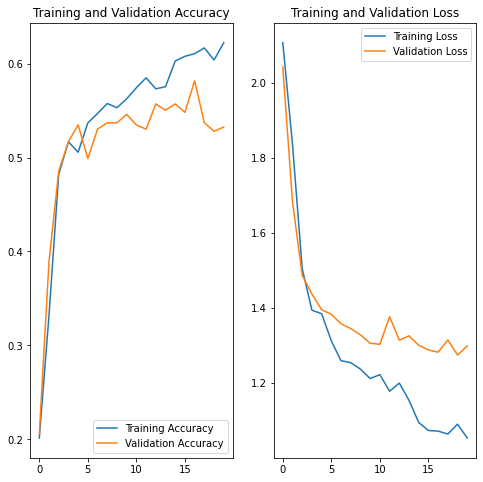

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Training model 

In [29]:
epochs = 50
# Train the model
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
56/56 [==============================] - 17s 297ms/step - loss: 2.1262 - accuracy: 0.2372 - val_loss: 1.9070 - val_accuracy: 0.2886
Epoch 2/50
56/56 [==============================] - 16s 286ms/step - loss: 1.8633 - accuracy: 0.3008 - val_loss: 1.8267 - val_accuracy: 0.3110
Epoch 3/50
56/56 [==============================] - 16s 280ms/step - loss: 1.6989 - accuracy: 0.4068 - val_loss: 1.5594 - val_accuracy: 0.4944
Epoch 4/50
56/56 [==============================] - 16s 280ms/step - loss: 1.5374 - accuracy: 0.4643 - val_loss: 1.4356 - val_accuracy: 0.5101
Epoch 5/50
56/56 [==============================] - 16s 289ms/step - loss: 1.3995 - accuracy: 0.5084 - val_loss: 1.3652 - val_accuracy: 0.5190
Epoch 6/50
56/56 [==============================] - 16s 281ms/step - loss: 1.4250 - accuracy: 0.4911 - val_loss: 1.3488 - val_accuracy: 0.5235
Epoch 7/50
56/56 [==============================] - 16s 282ms/step - loss: 1.3747 - accuracy: 0.5162 - val_loss: 1.4046 - val_accuracy: 0.5190

### Validating the model in test dataset

In [30]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test
                                                                   , image_size=(img_height, img_width)
                                                                   , batch_size=batch_size
                                                                   )
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

Found 118 files belonging to 9 classes.


Predictions:
 [0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1
 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0
 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0
 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0
 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1]
Labels:
 [8 4 3 7 2 1 1 7 1 2 0 5 7 4 3 4 1 5 2 3 4 1 6 3 2 4 3 2 7 1 7 7]


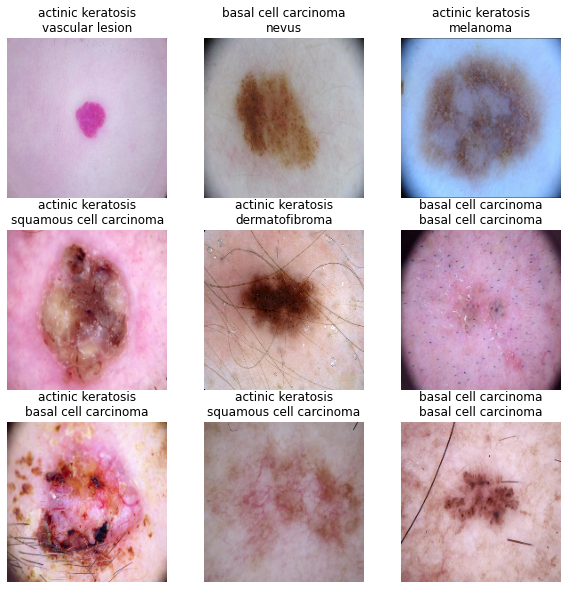

In [31]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predictions[i]] + "\n" + class_names[label_batch[i]])
    plt.axis("off")